<a href="https://colab.research.google.com/github/NithninKomara/Nithin_Komara/blob/main/Copy_of_Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Heart Disease Prediction**

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [3]:
from google.colab import files
uploaded = files.upload()  # Choose Heart_Disease_Prediction.csv when prompted

Saving Heart_Disease_Prediction.csv to Heart_Disease_Prediction.csv


#Load Dataset

In [4]:
data = pd.read_csv("Heart_Disease_Prediction.csv")
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


#Inspect Dataset

In [5]:
data.info()
data.isnull().sum()
data['Heart Disease'].unique()  # Check target values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

array(['Presence', 'Absence'], dtype=object)

#column Heart Disease has string values: "Presence" and "Absence".
We must convert them to numeric (1 for Presence, 0 for Absence) before training.

In [6]:
# Convert 'Heart Disease' to binary numeric values
data['Heart Disease'] = data['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Confirm conversion
print(data['Heart Disease'].unique())  # should print [1 0]

[1 0]


#now y will not have null values

In [7]:
X = data.drop('Heart Disease', axis=1)
y = data['Heart Disease']

# split your data into training and testing sets.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features so that all columns are on a similar scale.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train the three models using your scaled training data

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize models
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

#Evaluate Models

In [11]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"ROC-AUC: {auc:.3f}")

evaluate_model("Logistic Regression", lr)
evaluate_model("Random Forest", rf)
evaluate_model("SVM", svm)


Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54

ROC-AUC: 0.947

Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54

ROC-AUC: 0.882

SVM Evaluation:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.89      0.81      0.85        21

    accuracy                           0.89        54
   macro avg       0.

# Plot ROC Curves

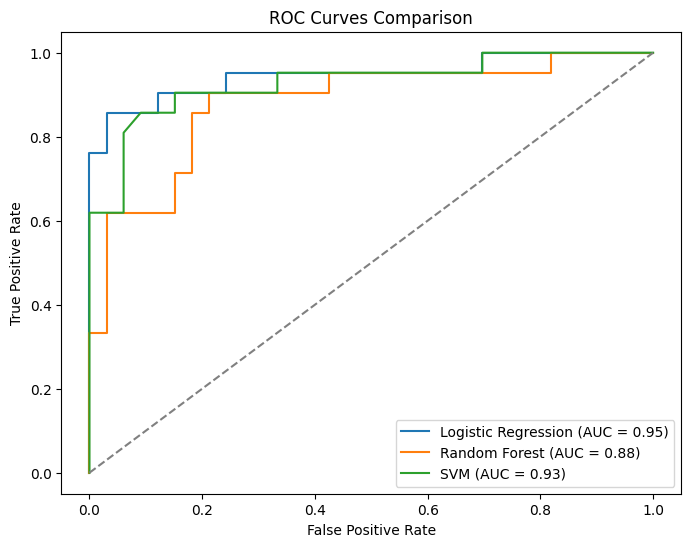

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

for model, name in [(lr, "Logistic Regression"), (rf, "Random Forest"), (svm, "SVM")]:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

#Check Feature Importance (Random Forest)
This shows which features matter most for prediction:

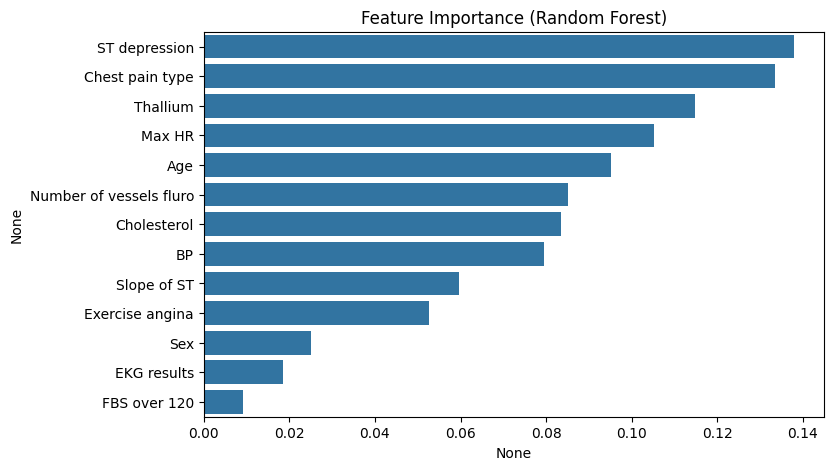

In [13]:
import seaborn as sns
import pandas as pd

importances = rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

#Save the best model

In [14]:
import joblib
joblib.dump(rf, "best_heart_disease_model.pkl")
print("Best model saved as best_heart_disease_model.pkl")

Best model saved as best_heart_disease_model.pkl


#Download the model

In [15]:
from google.colab import files
files.download("best_heart_disease_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>